In [1]:
###################### Load Libraries and Data ######################
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import *
import seaborn as sns
from matplotlib import rcParams
import datetime as dt
import glob, os 

In [2]:
# path = r'C:\Users\mondalm\CitiBike-rider-data'
# files = glob.iglob(os.path.join(path, "*.csv"), recursive=True)     
# #df = concat([read_csv(f, header=None,low_memory=False) for f in files], keys=files)
# #df.types
# dataframes = (pd.read_csv(f,header=None,low_memory=False) for f in files)
# df = pd.concat(dataframes,ignore_index=True)
# #df.dtypes


In [3]:
# ##Scrappy way to get column names in the header.
# df2 = pd.read_csv('C:/Users/mondalm/CitiBike-rider-data/201701-citibike-tripdata.csv')
# df.columns = df2.columns
# del[df2]
# df.columns
# print(df.shape)
# print(df.columns)
# #print(df['Start Time'])
# #df = df[df[1] != 'starttime']#Could've just dropped duplicate rows here as well
# #df = df[df[1] != 'Start Time']
# #print(df.shape)
# df.to_csv('C:/Mithun/study/Citibike-analysis/2017-1-12.csv')

In [4]:
###################### Code above only needs to be run once ######################
#Load aggregated dataset to minimize time needed to run the code
df = read_csv('C:/Mithun/study/Citibike-analysis/2017-1-12.csv',low_memory=False,skiprows=1)
df.dtypes

0                           int64
Trip Duration              object
Start Time                 object
Stop Time                  object
Start Station ID           object
Start Station Name         object
Start Station Latitude     object
Start Station Longitude    object
End Station ID             object
End Station Name           object
End Station Latitude       object
End Station Longitude      object
Bike ID                    object
User Type                  object
Birth Year                 object
Gender                     object
dtype: object

In [5]:
#df = df.drop(['Unnamed: 0'], axis = 1)
df = df.drop(['0'], axis = 1)
df_copy = df
df.tail(10)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
5084654,2443,2017-05-31 23:58:56,2017-06-01 00:39:40,144,Nassau St & Navy St,40.69839895,-73.98068914,387,Centre St & Chambers St,40.71273266,-74.0046073,29340,Customer,NaN,0
5084655,2441,2017-05-31 23:59:00,2017-06-01 00:39:41,144,Nassau St & Navy St,40.69839895,-73.98068914,387,Centre St & Chambers St,40.71273266,-74.0046073,25838,Subscriber,1989,1
5084656,239,2017-05-31 23:59:06,2017-06-01 00:03:06,477,W 41 St & 8 Ave,40.75640548,-73.9900262,447,8 Ave & W 52 St,40.76370739,-73.9851615,27294,Subscriber,1974,1
5084657,2427,2017-05-31 23:59:09,2017-06-01 00:39:36,144,Nassau St & Navy St,40.69839895,-73.98068914,387,Centre St & Chambers St,40.71273266,-74.0046073,18504,Customer,NaN,0
5084658,380,2017-05-31 23:59:14,2017-06-01 00:05:34,482,W 15 St & 7 Ave,40.73935542,-73.99931783,402,Broadway & E 22 St,40.7403432,-73.98955109,17864,Subscriber,1971,1
5084659,1387,2017-05-31 23:59:26,2017-06-01 00:22:33,3449,Eckford St & Engert Ave,40.721462562298164,-73.94800901412964,364,Lafayette Ave & Classon Ave,40.68900443,-73.96023854,27033,Subscriber,1987,1
5084660,759,2017-05-31 23:59:32,2017-06-01 00:12:12,3163,Central Park West & W 68 St,40.7734066,-73.97782542,3289,W 90 St & Amsterdam Ave,40.79017948095081,-73.97288918495178,28849,Subscriber,1963,2
5084661,571,2017-05-31 23:59:48,2017-06-01 00:09:19,504,1 Ave & E 16 St,40.73221853,-73.98165557,128,MacDougal St & Prince St,40.72710258,-74.00297088,27034,Subscriber,1960,2
5084662,539,2017-05-31 23:59:50,2017-06-01 00:08:49,161,LaGuardia Pl & W 3 St,40.72917025,-73.99810231,504,1 Ave & E 16 St,40.73221853,-73.98165557,27430,Subscriber,1951,1
5084663,613,2017-05-31 23:59:55,2017-06-01 00:10:08,3082,Hope St & Union Ave,40.71167351,-73.95141312,3095,Graham Ave & Herbert St,40.71929301,-73.94500379,21265,Subscriber,1985,1


In [6]:
#Percentage of missing data.
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
print(missing_data(df))
print(df.dtypes)

                          Total   Percent
Birth Year               452740  8.904030
User Type                 15909  0.312882
Gender                        0  0.000000
Bike ID                       0  0.000000
End Station Longitude         0  0.000000
End Station Latitude          0  0.000000
End Station Name              0  0.000000
End Station ID                0  0.000000
Start Station Longitude       0  0.000000
Start Station Latitude        0  0.000000
Start Station Name            0  0.000000
Start Station ID              0  0.000000
Stop Time                     0  0.000000
Start Time                    0  0.000000
Trip Duration                 0  0.000000
Trip Duration              object
Start Time                 object
Stop Time                  object
Start Station ID           object
Start Station Name         object
Start Station Latitude     object
Start Station Longitude    object
End Station ID             object
End Station Name           object
End Station Latitude  

Let's check if there's any noise or cleanup which needs to be done before creating the chart.

1.	Any missing values?

o	Mostly for Birth year and a few for User Type. We can ignore these for now and deal with them later.

2.	Let's get the data in the right format
o	Trip Duration - Int

o	Start Time - DateTime

o	Stop Time - DateTime

o	Start Station ID - Categorical

o	Start Station Name - Categorical

o	User Type - Categorical

o	Birth Year - Ordinal

o	Gender - Categorical

3.	Deal with trips which lasted less than 1.5 minute (90 seconds). If so, in the ideal world, we should not include this start, we may double count. If a bike is broken, a user will dock it again within a minute or two and pick-up another one.

o	Would be ideal to not include any starts where a tip lasted less than 90 seconds and the start station = end station.

4.	Anomalies such as theft and broken docks shouldn't matter for this metric and can be dealt with later.



In [7]:
#Ensure data is formatted correctly to avoid errors in the visuals
df['Start Time'] = to_datetime(df['Start Time'],errors='coerce', format='%Y-%m-%d %H:%M:%S')
df['Stop Time'] = to_datetime(df['Stop Time'],errors='coerce', format='%Y-%m-%d %H:%M:%S')
df['Start Station Name'] = df['Start Station Name'].astype('category')
df['End Station Name'] = df['End Station Name'].astype('category')
df['User Type'] = df['User Type'].astype('category')
df['Gender'] = df['Gender'].astype('category')


print(df.dtypes)
print(df.head())
round(df.describe(),2)
#df['Trip Duration']

Trip Duration                      object
Start Time                 datetime64[ns]
Stop Time                  datetime64[ns]
Start Station ID                   object
Start Station Name               category
Start Station Latitude             object
Start Station Longitude            object
End Station ID                     object
End Station Name                 category
End Station Latitude               object
End Station Longitude              object
Bike ID                            object
User Type                        category
Birth Year                         object
Gender                           category
dtype: object
  Trip Duration          Start Time           Stop Time Start Station ID  \
0           680 2017-01-01 00:00:21 2017-01-01 00:11:41             3226   
1          1282 2017-01-01 00:00:45 2017-01-01 00:22:08             3263   
2           648 2017-01-01 00:00:57 2017-01-01 00:11:46             3143   
3           631 2017-01-01 00:01:10 2017-01-01 00:11

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
count,5084664,5084660,5084660,5084664,5084664,5084664,5084664,5084664,5084664,5084664,5084664,5084664,5068755,4631924,5084664
unique,17580,3568196,3572930,643,646,647,647,660,664,663,663,10566,4,97,5
top,340,2017-05-15 17:24:17,2017-05-23 18:03:34,519,Pershing Square North,40.751873,-73.977706,519,Pershing Square North,40.751873,-73.977706,26708,Subscriber,1989,1
freq,6399,12,11,54744,54744,54744,54744,53959,53959,53959,53959,1126,4597420,189087,3509576
first,NaN,2017-01-01 00:00:21,2017-01-01 00:10:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-05-31 23:59:55,2017-07-29 03:31:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Quasi Confirm Hypothesis in point #3
df_bikenum = pd.DataFrame()
#print(df[df['Trip Duration'] < '90'])
#above command will give filtered out dataframe and we are getting start station name 
#from that df as first bike stn or 2nd bike stn
df_bikenum['First Bike'] = df[df['Trip Duration'] < '90']['Start Station Name'] 
df_bikenum['Second Bike'] = df[df['Trip Duration'] < '90']['End Station Name']
df_bikenum.head()

,First Bike,Second Bike
0,W 82 St & Central Park West,Central Park West & W 72 St
1,Cooper Square & E 7 St,Broadway & W 32 St
2,5 Ave & E 78 St,3 Ave & E 71 St
3,5 Ave & E 78 St,3 Ave & E 71 St
4,5 Ave & E 78 St,3 Ave & E 71 St


In [9]:
#Clear up enviornment and drop double count
#df_bikenum.shape
#del(df_bikenum)
print(df.shape)
df.drop(df.index[(df['Trip Duration'] < '90') & 
                 (df['Start Station Latitude'] == df['End Station Latitude'])]
       , inplace=True)
print(df.shape)

### Below deletion using the filtering will change all the column datatype...so preferred 
##method is to drop the original 
# df = df[(df['Trip Duration'] < '90') & (df['Start Station Latitude'] == df['End Station Latitude'])]
print(df.shape)
df.dtypes

(5084664, 15)
(4996671, 15)
(4996671, 15)


Trip Duration                      object
Start Time                 datetime64[ns]
Stop Time                  datetime64[ns]
Start Station ID                   object
Start Station Name               category
Start Station Latitude             object
Start Station Longitude            object
End Station ID                     object
End Station Name                 category
End Station Latitude               object
End Station Longitude              object
Bike ID                            object
User Type                        category
Birth Year                         object
Gender                           category
dtype: object

In [10]:
#Data for Top 5 Stations visual
top5_start_stations = pd.DataFrame()
#print(df['Start Station Name'].unique)
#print(df['Start Station Name'].value_counts()) #--> give all the stn name and 
#its total occurence
#print(df['Start Station Name'].value_counts().head()) #--> give top 5 the stn name as index and 
#its total occurence as values
top5_start_stations['Station'] = df['Start Station Name'].value_counts().head().index
top5_start_stations['Number of Starts'] = df['Start Station Name'].value_counts().head().values
top5_start_stations['Station'] = top5_start_stations['Station'].cat.remove_unused_categories()
top5_start_stations['Station'] = top5_start_stations['Station'].astype('object')
top5_start_stations

,Station,Number of Starts
0,Pershing Square North,54555
1,Broadway & E 22 St,36342
2,E 17 St & Broadway,36336
3,W 21 St & 6 Ave,34964
4,8 Ave & W 33 St,31101


In [11]:
#Data for Top 5 Stations visual
# top5 = pd.DataFrame() 
# print(df['Start Station Name'].value_counts().head())
# top5['Station']=df['Start Station Name'].value_counts().head().index
# print(top5)
# top5['Number of Starts']=df['Start Station Name'].value_counts().head().values
# top5['Station'] = top5['Station'].cat.remove_unused_categories()
# top5['Station'] = top5['Station'].astype('object')
# top5

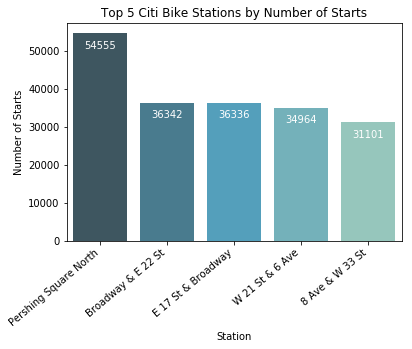

In [12]:
#Plot for Part 1: Top 5 Stations
ax = sns.barplot('Station', 'Number of Starts', data = top5_start_stations, palette="GnBu_d")
ax.set_title('Top 5 Citi Bike Stations by Number of Starts', fontsize = 12)
rcParams['figure.figsize'] = 12,7
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha = 'right')
for index, row in top5_start_stations.iterrows():
    ax.text(index,row['Number of Starts']-4000,row['Number of Starts'], 
            color='white', ha="center", fontsize = 10)
plt.show()

Trip Duration by User Type

Anomalies: Any trip which lasts longer than 2 hours (7,200 seconds) probably indicates a stolen bike, an anomaly, or incorrect docking of the bike. As an avid Citibike user, I know first hand that it doesn't make any sense for one to use a bike for more than one hour! However, I've added a one hour cushion just in case. No rider would plan to go over the maximum 45 minutes allowed. However, I wplan to reduce this to one hour in the future for modelling purposes.

First Half- with anomalies in dataset

The graph under ax2 is a bargraph of average trip duration for each user type. It's helpful, but would be better to see a boxplot and get an idea of the distribution and see mintues instead of seconds.

Second graph is a basic Boxplot based with anomalies included. As we can see, there is too much noise for this to be useful. It'll be better to look at this without anomalies.

Second Half - without anomalies in dataset

Still not useful, let's add a column with minutes for trip Duration.

Boxplot with minutes is much more useful. There are still some outliers, however, it is informative. 


In [13]:
del(top5_start_stations)
#Drop NA Usertype
print(df.shape)
df = df.dropna(subset=['User Type'])
print(df.shape)
df.dtypes
df.head()

(4996671, 15)
(4981463, 15)


,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.78275,-73.97137,3165,Central Park West & W 72 St,40.77579376683666,-73.9762057363987,25542,Subscriber,1965,2
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.72923649910006,-73.99086803197861,498,Broadway & W 32 St,40.74854862,-73.98808416,21136,Subscriber,1987,2
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.77682863439968,-73.96388769149779,3152,3 Ave & E 71 St,40.76873687,-73.96119945,18147,Customer,NaN,0
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.77682863439968,-73.96388769149779,3152,3 Ave & E 71 St,40.76873687,-73.96119945,21211,Customer,NaN,0
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.77682863439968,-73.96388769149779,3152,3 Ave & E 71 St,40.76873687,-73.96119945,26819,Customer,NaN,0


In [14]:
df_copy = df
print(df.shape)
print(df.dtypes)


print(df_copy.shape)
print(df_copy.dtypes)

(4981463, 15)
Trip Duration                      object
Start Time                 datetime64[ns]
Stop Time                  datetime64[ns]
Start Station ID                   object
Start Station Name               category
Start Station Latitude             object
Start Station Longitude            object
End Station ID                     object
End Station Name                 category
End Station Latitude               object
End Station Longitude              object
Bike ID                            object
User Type                        category
Birth Year                         object
Gender                           category
dtype: object
(4981463, 15)
Trip Duration                      object
Start Time                 datetime64[ns]
Stop Time                  datetime64[ns]
Start Station ID                   object
Start Station Name               category
Start Station Latitude             object
Start Station Longitude            object
End Station ID                    

In [15]:
#Calculate trip duration
print(df_copy['User Type'].value_counts())

## Clean below data...
print(df_copy.shape)

###### Below cleaning did not work #######################
    # df1= df_copy.loc[(df_copy['User Type'] != 'User Type') | (df_copy['User Type'] != 'usertype')]
    # df1.dtypes
    # print(df1.shape)
    # df1.head()


###### Below cleaning worked #######################
bad_usertype =['User Type' , 'usertype']
df2= df_copy[~df_copy['User Type'].isin(bad_usertype)]
print(df2.shape)

df2.head()
#cross check if the bad_usertype is still there...
#df2[df2['User Type'] == 'User Type']



Subscriber    4538676
Customer       442783
usertype            2
User Type           2
Name: User Type, dtype: int64
(4981463, 15)
(4981459, 15)


,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.78275,-73.97137,3165,Central Park West & W 72 St,40.77579376683666,-73.9762057363987,25542,Subscriber,1965,2
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.72923649910006,-73.99086803197861,498,Broadway & W 32 St,40.74854862,-73.98808416,21136,Subscriber,1987,2
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.77682863439968,-73.96388769149779,3152,3 Ave & E 71 St,40.76873687,-73.96119945,18147,Customer,NaN,0
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.77682863439968,-73.96388769149779,3152,3 Ave & E 71 St,40.76873687,-73.96119945,21211,Customer,NaN,0
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.77682863439968,-73.96388769149779,3152,3 Ave & E 71 St,40.76873687,-73.96119945,26819,Customer,NaN,0


In [16]:

#FIX: ValueError: invalid literal for int() with base 10: 'Trip Duration'

###### Below dont work #######
#df.apply(pd.to_numeric, errors='ignore')
#df['Trip Duration'] = df['Trip Duration'].apply(pd.to_numeric)
#df['Trip Duration']=df['Trip Duration'].str.replace('.', '').astype(int)
###################################


df2['Trip Duration'] = pd.to_numeric(df2['Trip Duration'] ,errors='coerce')

C:\Users\mondalm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [17]:
print(df2['User Type'].value_counts())
#df2.groupby(['User Type']).groups.keys()
#df2.groupby('User Type')['Trip Duration'].mean()
TD_user = pd.DataFrame()
TD_user['Avg. Trip Duration'] = round(df2.groupby('User Type')['Trip Duration'].mean(),2)

print(TD_user)

TD_user = TD_user.reset_index()
TD_user
TD_user.dtypes
TD_user['User Type'] = TD_user['User Type'] .astype('object')
TD_user.dtypes

Subscriber    4538676
Customer       442783
usertype            0
User Type           0
Name: User Type, dtype: int64
            Avg. Trip Duration
User Type                     
Customer               2199.12
Subscriber              783.30
User Type                  NaN
usertype                   NaN


User Type              object
Avg. Trip Duration    float64
dtype: object

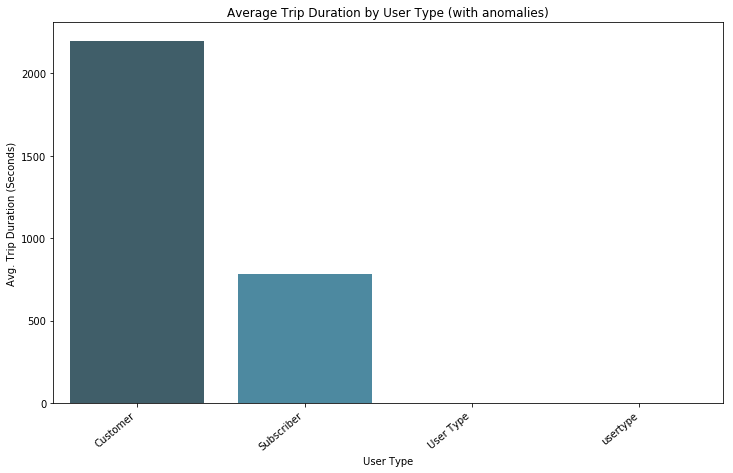

In [18]:
#Average trip Duration per User Type with Anomalies

ax2 = sns.barplot('User Type','Avg. Trip Duration',data=TD_user , palette = "GnBu_d")
ax2.set_title('Average Trip Duration by User Type (with anomalies)')

ax2.set_xticklabels(ax2.get_xticklabels(),rotation=40, ha = 'right')
ax2.set_ylabel('Avg. Trip Duration (Seconds)')

# for index, row in TD_user.iterrows():
#     ax2.text(index,row['Avg. Trip Duration']-70,(str(row['Avg. Trip Duration'])+"  Seconds"), 
#              color='white', ha="center", fontsize = 10)

plt.show()

In [19]:
del(TD_user)

C:\Users\mondalm\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


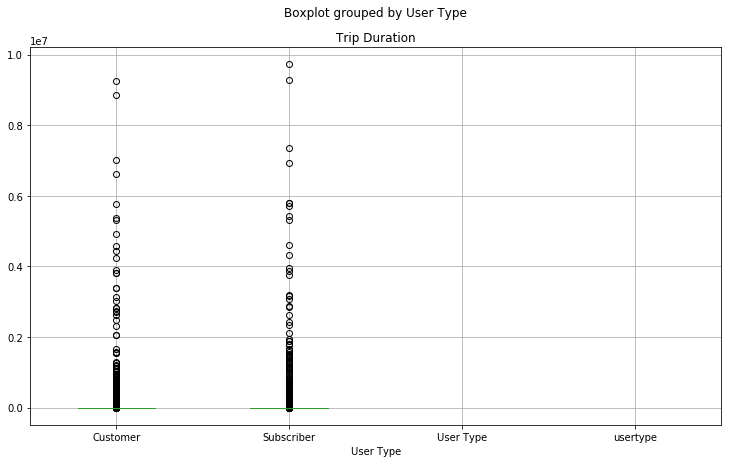

In [20]:
#Boxplots are more informative to visualize breakdown of data
df2.boxplot('Trip Duration', by = 'User Type')
plt.show()

In [21]:
#Remove anomalies based on definition above
df2 = df2.drop(df2.index[(df2['Trip Duration'] > 7200)])

C:\Users\mondalm\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


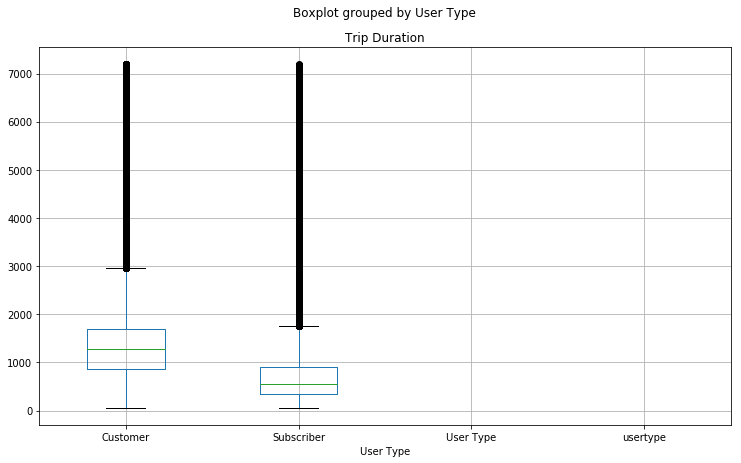

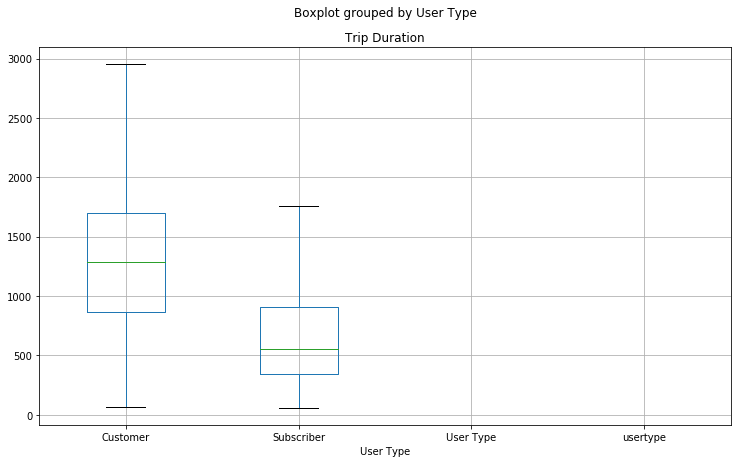

In [22]:
#Boxplots are more informative to visualize breakdown of data
df2.boxplot('Trip Duration', by = 'User Type')
plt.show()

#Boxplot without outliers
df2.boxplot('Trip Duration', by = 'User Type',showfliers=False)
plt.show()

In [23]:
#Add Minutes column for Trip Duration
df2['Minutes'] = df2['Trip Duration']/60
#For Visual purposes, rounded
df2['Minutes'] = round(df2['Minutes'])
df2['Minutes'] = df2['Minutes'].astype(int)

C:\Users\mondalm\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


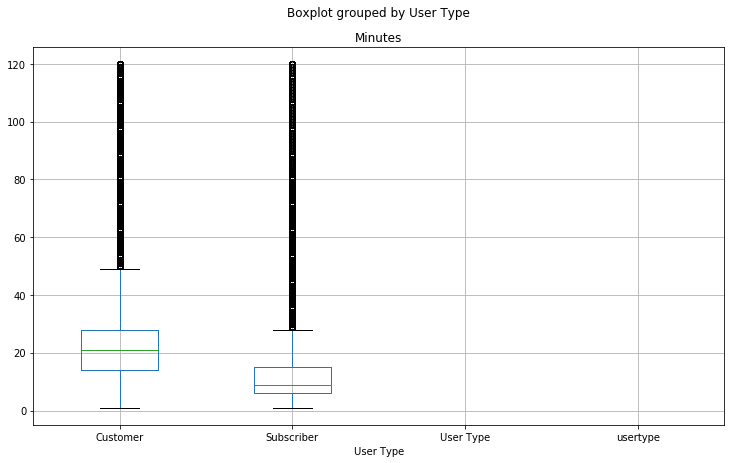

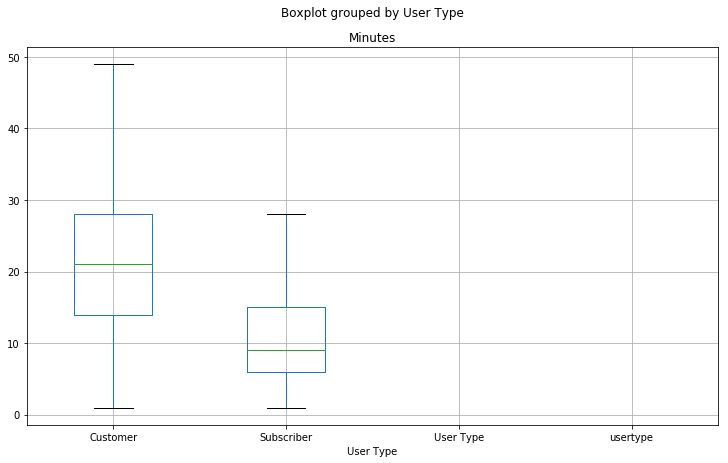

In [24]:
#Final Boxplot with some outliers. Could turn of outliers with showfliers = False
df2.boxplot('Minutes', by = 'User Type')
plt.show()
df2.boxplot('Minutes', by = 'User Type', showfliers = False)
plt.show()

In [25]:
TD_user2 = pd.DataFrame()
#TD_user2= df2.groupby('User Type').mean() -- will give mean for all numeric columns 
#TD_user2= df2.groupby('User Type').size() -- total counts for each group 
#print(df2['User Type'].value_counts()) ---- total counts for each group 
#TD_user2

#Below will produce dataframe for usert type with Avg trip duration (in Mins)
TD_user2['Avg. Trip Duration']= round(df2.groupby('User Type')['Minutes'].mean(),1)
TD_user2 = TD_user2.reset_index()
TD_user2['User Type']= TD_user2['User Type'].astype('object')

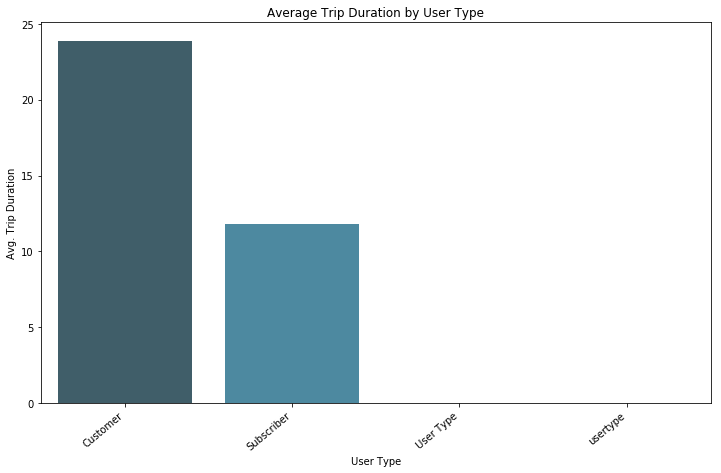

In [26]:
#Average Trip Duration Based on Minutes
ax3 = sns.barplot('User Type', 'Avg. Trip Duration', data = TD_user2,palette="GnBu_d")
ax3.set_title('Average Trip Duration by User Type')
#rcParams['figure.figsize'] = 12,10
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=40, ha = 'right')
# for index, row in TD_user2.iterrows():
#     ax3.text(row.name,row['Avg. Trip Duration']-1,(str(row['Avg. Trip Duration'])+"  Minutes"), 
#              color='white', ha="center", fontsize = 10)
plt.show()

In [27]:
del(TD_user2)

In [28]:
#Undo rounding for modelling purposes
df2['Minutes'] = df2['Trip Duration']/60

Part 3: Most Popular Trip

To get most popular trips, the most convenient way to do this is by using the groupby function in pandas. It's analogous to a Pivot table.

The groupby function makes it extremely easy and convenient to identify the most popular trips. Visuals and transformations can be found below.

In [29]:
#Identify the 10 most popular trips
trips_df = pd.DataFrame()
#belwo will give dataframe cgroup by columns and thier total counts...
trips_df = df2.groupby(['Start Station Name','End Station Name']).size().reset_index(name = 'Number of Trips')

trips_df= trips_df.sort_values('Number of Trips', ascending = False)
trips_df["Start Station Name"]= trips_df["Start Station Name"].astype(str)
trips_df["End Station Name"] = trips_df["End Station Name"].astype(str)
trips_df["Trip"] = trips_df["Start Station Name"] + " to " + trips_df["End Station Name"]
#Tkae 10 most popular trips from the frame
trips_df =trips_df[:10]
trips_df = trips_df.drop(['Start Station Name', "End Station Name"], axis = 1)
#trips_df
trips_df = trips_df.reset_index()
trips_df

,index,Number of Trips,Trip
0,91755,2899,E 7 St & Avenue A to Cooper Square & E 7 St
1,45424,1912,Central Park S & 6 Ave to 5 Ave & E 88 St
2,145608,1884,Pershing Square North to W 33 St & 7 Ave
3,172900,1787,W 21 St & 6 Ave to 9 Ave & W 22 St
4,145226,1606,Pershing Square North to Broadway & W 32 St
5,139599,1563,N 6 St & Bedford Ave to Wythe Ave & Metropolit...
6,145330,1475,Pershing Square North to E 24 St & Park Ave S
7,77384,1434,E 33 St & 2 Ave to W 33 St & 7 Ave
8,175731,1418,W 26 St & 8 Ave to W 27 St & 10 Ave
9,150656,1405,Richardson St & N Henry St to Graham Ave & Con...


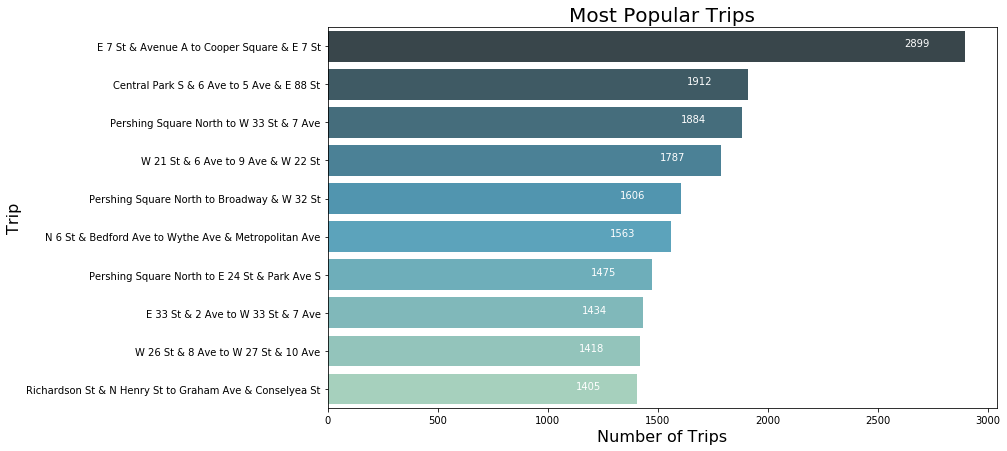

In [30]:
ax4 = sns.barplot('Number of Trips','Trip', data = trips_df,palette="GnBu_d")
ax4.set_title('Most Popular Trips', fontsize = 20)
ax4.set_ylabel("Trip",fontsize=16)
ax4.set_xlabel("Number of Trips",fontsize=16)
for index, row in trips_df.iterrows():
    ax4.text(row['Number of Trips']-220,index,row['Number of Trips'], 
             color='white', ha="center",fontsize = 10)
plt.show()

In [31]:
del(trips_df)

In [32]:
df2.dtypes
df2['Birth Year']=df2['Birth Year'].astype('float')
#df2['Birth Year'] = pd.to_numeric(df2['Birth Year'] ,errors='coerce')
df2.dtypes
#Drop the tail end of birth years 2 standard deviations below the mean
#df2['Birth Year'].mean()-(2*df2['Birth Year'].std()) --> 1954.3506877991333
df2.shape
df2 = df2.drop(df2.index[(df2['Birth Year'] < 1956)])
df2.shape

(4773473, 16)

In [33]:
#Combine coordinates to calculate distance based on Vincenty
df2['Start Coordinates'] = list(zip(df2['Start Station Latitude'], df2['Start Station Longitude']))
df2['End Coordinates'] = list(zip(df2['End Station Latitude'], df2['End Station Longitude']))

In [36]:
# from geopy.distance import vincenty
# dist = []
# for i in range(len(df2)):
#     #print(vincenty(df2.iloc[i]['Start Coordinates'],df2.iloc[i]['End Coordinates']).miles)
#     dist.append(vincenty(df2.iloc[i]['Start Coordinates'],df2.iloc[i]['End Coordinates']).miles)
# #     if (i%1000000==0):
# #         print(i)
# dist_df = pd.DataFrame({'Distance':dist})
# dist_df.to_csv('C:/Mithun/study/Citibike-analysis/Distance.csv')

df2.shape
        
 #(4773473, 18)       

(4773473, 18)

In [60]:
dist= read_csv('C:/Mithun/study/Citibike-analysis/Distance.csv',low_memory=False,skiprows=1,header = None)
print(dist.head())
dist = dist.drop([0], axis = 1)


   0         1
0  0  0.542899
1  1  1.340572
2  2  0.575889
3  3  0.575889
4  4  0.575889


In [62]:

print(dist.head())
#dist.reset_index()
# df = df.drop('index',axis =1)
dist.head()
#dist.shape
df2['Distance']= dist
df2.head()

          1
0  0.542899
1  1.340572
2  0.575889
3  0.575889
4  0.575889


,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Minutes,Start Coordinates,End Coordinates,Distance
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.78275,-73.97137,3165,Central Park West & W 72 St,40.77579376683666,-73.9762057363987,25542,Subscriber,1965.0,2,11.333333,"(40.78275, -73.97137)","(40.77579376683666, -73.9762057363987)",0.542899
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.72923649910006,-73.99086803197861,498,Broadway & W 32 St,40.74854862,-73.98808416,21136,Subscriber,1987.0,2,21.366667,"(40.72923649910006, -73.99086803197861)","(40.74854862, -73.98808416)",1.340572
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.77682863439968,-73.96388769149779,3152,3 Ave & E 71 St,40.76873687,-73.96119945,18147,Customer,NaN,0,10.800000,"(40.77682863439968, -73.96388769149779)","(40.76873687, -73.96119945)",0.575889
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.77682863439968,-73.96388769149779,3152,3 Ave & E 71 St,40.76873687,-73.96119945,21211,Customer,NaN,0,10.516667,"(40.77682863439968, -73.96388769149779)","(40.76873687, -73.96119945)",0.575889
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.77682863439968,-73.96388769149779,3152,3 Ave & E 71 St,40.76873687,-73.96119945,26819,Customer,NaN,0,10.350000,"(40.77682863439968, -73.96388769149779)","(40.76873687, -73.96119945)",0.575889


In [63]:
#Test check
print(vincenty((40.78275, -73.97137),(40.77579376683666, -73.9762057363987)).miles)

0.5428991489820616


In [64]:
del(dist)

In [67]:
#Replace missing birth year by median based on speed and gender
df2['Birth Year']= df2.groupby(['Gender','Start Station ID'])['Birth Year']\
.transform(lambda x : x.fillna(x.median()))


In [68]:
print(missing_data(df2))
print(df2.dtypes)

                          Total   Percent
Distance                 292712  6.132055
Birth Year                 2360  0.049440
End Station Name              0  0.000000
Start Time                    0  0.000000
Stop Time                     0  0.000000
Start Station ID              0  0.000000
Start Station Name            0  0.000000
Start Station Latitude        0  0.000000
Start Station Longitude       0  0.000000
End Station ID                0  0.000000
End Station Latitude          0  0.000000
End Coordinates               0  0.000000
End Station Longitude         0  0.000000
Bike ID                       0  0.000000
User Type                     0  0.000000
Gender                        0  0.000000
Minutes                       0  0.000000
Start Coordinates             0  0.000000
Trip Duration                 0  0.000000
Trip Duration                       int64
Start Time                 datetime64[ns]
Stop Time                  datetime64[ns]
Start Station ID                  

In [69]:
#Still have a few nulls
df2 = df2.dropna(subset=['Birth Year'])

In [70]:
print(missing_data(df2))

                          Total   Percent
Distance                 292343  6.127354
End Station Name              0  0.000000
Start Time                    0  0.000000
Stop Time                     0  0.000000
Start Station ID              0  0.000000
Start Station Name            0  0.000000
Start Station Latitude        0  0.000000
Start Station Longitude       0  0.000000
End Station ID                0  0.000000
End Station Latitude          0  0.000000
End Coordinates               0  0.000000
End Station Longitude         0  0.000000
Bike ID                       0  0.000000
User Type                     0  0.000000
Birth Year                    0  0.000000
Gender                        0  0.000000
Minutes                       0  0.000000
Start Coordinates             0  0.000000
Trip Duration                 0  0.000000
Trip Duration                       int64
Start Time                 datetime64[ns]
Stop Time                  datetime64[ns]
Start Station ID                  

In [71]:
#Calculate age and drop circular/roundtrips
df2['Age'] = 2018 - df2['Birth Year']
df2['Age'] = df2['Age'].astype(int)
df2.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Minutes,Start Coordinates,End Coordinates,Distance,Age
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.78275,-73.97137,3165,Central Park West & W 72 St,40.77579376683666,-73.9762057363987,25542,Subscriber,1965.0,2,11.333333,"(40.78275, -73.97137)","(40.77579376683666, -73.9762057363987)",0.542899,53
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.72923649910006,-73.99086803197861,498,Broadway & W 32 St,40.74854862,-73.98808416,21136,Subscriber,1987.0,2,21.366667,"(40.72923649910006, -73.99086803197861)","(40.74854862, -73.98808416)",1.340572,31
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.77682863439968,-73.96388769149779,3152,3 Ave & E 71 St,40.76873687,-73.96119945,18147,Customer,1962.0,0,10.800000,"(40.77682863439968, -73.96388769149779)","(40.76873687, -73.96119945)",0.575889,56
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.77682863439968,-73.96388769149779,3152,3 Ave & E 71 St,40.76873687,-73.96119945,21211,Customer,1962.0,0,10.516667,"(40.77682863439968, -73.96388769149779)","(40.76873687, -73.96119945)",0.575889,56
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.77682863439968,-73.96388769149779,3152,3 Ave & E 71 St,40.76873687,-73.96119945,26819,Customer,1962.0,0,10.350000,"(40.77682863439968, -73.96388769149779)","(40.76873687, -73.96119945)",0.575889,56


In [72]:
df2.shape

(4771113, 20)

In [73]:
df2 = df2.drop(df2.index[(df2['Distance'] == 0)])
df2.shape

(4766757, 20)

In [75]:
df2['Distance'] = df2.groupby(['Gender','Start Station ID'])['Distance']\
.transform(lambda x: x.fillna(x.median()))

In [76]:
print(missing_data(df2))

                         Total   Percent
Distance                   278  0.005832
Age                          0  0.000000
Start Time                   0  0.000000
Stop Time                    0  0.000000
Start Station ID             0  0.000000
Start Station Name           0  0.000000
Start Station Latitude       0  0.000000
Start Station Longitude      0  0.000000
End Station ID               0  0.000000
End Station Name             0  0.000000
End Station Latitude         0  0.000000
End Station Longitude        0  0.000000
Bike ID                      0  0.000000
User Type                    0  0.000000
Birth Year                   0  0.000000
Gender                       0  0.000000
Minutes                      0  0.000000
Start Coordinates            0  0.000000
End Coordinates              0  0.000000
Trip Duration                0  0.000000


In [77]:
df2['min_mile'] = round(df2['Minutes']/df2['Distance'], 2)
df2['mile_hour'] = round(df2['Distance']/(df2['Minutes']/60),2)

In [82]:
print(df2.dtypes)
df2.head()


Trip Duration                       int64
Start Time                 datetime64[ns]
Stop Time                  datetime64[ns]
Start Station ID                   object
Start Station Name               category
Start Station Latitude             object
Start Station Longitude            object
End Station ID                     object
End Station Name                 category
End Station Latitude               object
End Station Longitude              object
Bike ID                            object
User Type                        category
Birth Year                        float64
Gender                           category
Minutes                           float64
Start Coordinates                  object
End Coordinates                    object
Distance                          float64
Age                                 int32
min_mile                          float64
mile_hour                         float64
dtype: object


,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,...,User Type,Birth Year,Gender,Minutes,Start Coordinates,End Coordinates,Distance,Age,min_mile,mile_hour
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.78275,-73.97137,3165,Central Park West & W 72 St,40.77579376683666,...,Subscriber,1965.0,2,11.333333,"(40.78275, -73.97137)","(40.77579376683666, -73.9762057363987)",0.542899,53,20.88,2.87
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.72923649910006,-73.99086803197861,498,Broadway & W 32 St,40.74854862,...,Subscriber,1987.0,2,21.366667,"(40.72923649910006, -73.99086803197861)","(40.74854862, -73.98808416)",1.340572,31,15.94,3.76
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.77682863439968,-73.96388769149779,3152,3 Ave & E 71 St,40.76873687,...,Customer,1962.0,0,10.800000,"(40.77682863439968, -73.96388769149779)","(40.76873687, -73.96119945)",0.575889,56,18.75,3.20
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.77682863439968,-73.96388769149779,3152,3 Ave & E 71 St,40.76873687,...,Customer,1962.0,0,10.516667,"(40.77682863439968, -73.96388769149779)","(40.76873687, -73.96119945)",0.575889,56,18.26,3.29
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.77682863439968,-73.96388769149779,3152,3 Ave & E 71 St,40.76873687,...,Customer,1962.0,0,10.350000,"(40.77682863439968, -73.96388769149779)","(40.76873687, -73.96119945)",0.575889,56,17.97,3.34


In [79]:
#Let's check for data integrity to make sure all the numbers look as expected. Only numerical data included
round(df2.describe(),2)

,Trip Duration,Birth Year,Minutes,Distance,Age,min_mile,mile_hour
count,4766757.00,4766757.00,4766757.00,4766479.00,4766757.00,4766479.00,4766479.00
mean,771.15,1979.32,12.85,1.12,38.68,19.00,8.77
std,611.53,10.22,10.19,2.60,10.22,2038.16,13.01
min,61.00,1956.00,1.02,0.00,17.00,0.00,0.00
25%,359.00,1972.00,5.98,0.57,30.00,5.67,2.74
50%,589.00,1981.00,9.82,0.89,37.00,11.13,5.39
75%,1005.00,1988.00,16.75,1.40,46.00,21.90,10.58
max,7200.00,2001.00,120.00,5385.04,62.00,4449504.87,15968.82


In [83]:
df2.dtypes

Trip Duration                       int64
Start Time                 datetime64[ns]
Stop Time                  datetime64[ns]
Start Station ID                   object
Start Station Name               category
Start Station Latitude             object
Start Station Longitude            object
End Station ID                     object
End Station Name                 category
End Station Latitude               object
End Station Longitude              object
Bike ID                            object
User Type                        category
Birth Year                        float64
Gender                           category
Minutes                           float64
Start Coordinates                  object
End Coordinates                    object
Distance                          float64
Age                                 int32
min_mile                          float64
mile_hour                         float64
dtype: object

In [84]:
df2 = df2[df2['Distance'] < 30]

In [86]:
print(df2.shape)
df2= df2[df2['mile_hour']<20]
df2 = df2[df2['mile_hour']> (df2['mile_hour'].mean()-(2*df2['mile_hour'].std()))]

In [87]:
df2.shape

(4317227, 22)

In [100]:
#Dropping unknown to make the visual more informative. 
#Unknown gender may be important for the model, which is why I created a copy of the original dataframe.
df3 = df2.drop(df2.index[(df2['Gender'] == '0')])

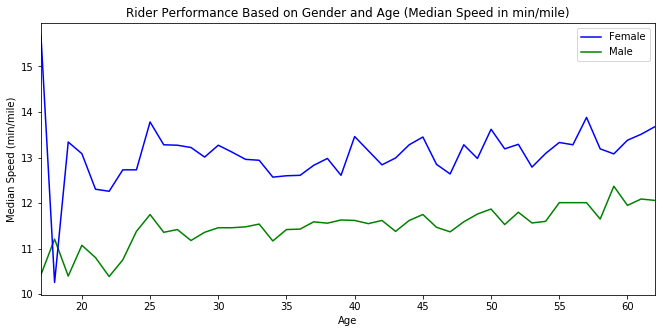

In [102]:
#Rider performance by age and Gender in Min/Mile 
fig, ax5 = plt.subplots(figsize=(11,5))
df3.groupby(['Age','Gender']).median()['min_mile'].unstack().plot(ax=ax5, color ="bg")
ax5.legend(['Female','Male'])
plt.ylabel('Median Speed (min/mile)')
plt.title('Rider Performance Based on Gender and Age (Median Speed in min/mile)')
plt.show()

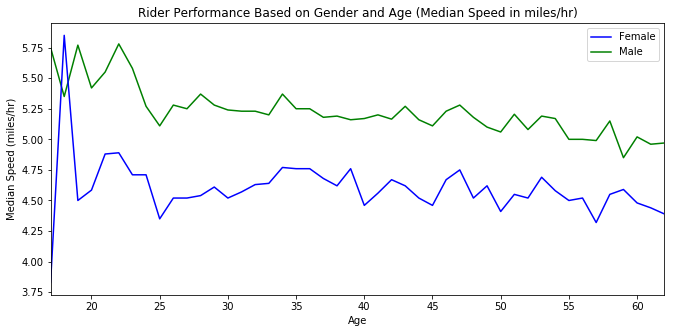

In [103]:
#del([fig,ax5])
fig1, ax6 = plt.subplots(figsize=(11,5))
#print(df3[df3['Gender'] == '1'])
df3.groupby(['Age','Gender']).median()['mile_hour'].head()
df3.groupby(['Age','Gender']).median()['mile_hour'].unstack().plot(ax=ax6,color ="bg")
ax6.legend(['Female', 'Male'])
plt.ylabel('Median Speed (miles/hr)')
plt.title('Rider Performance Based on Gender and Age (Median Speed in miles/hr)')
plt.show()

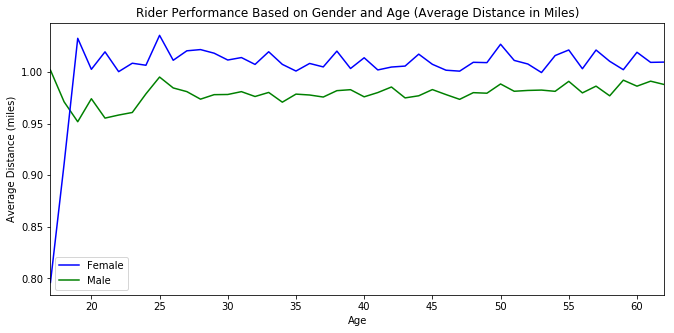

In [104]:
#Rider performance by age and Gender in Averge Distance
del([fig1,ax6])
fig2, ax7 = plt.subplots(figsize=(11,5))
df3.groupby(['Age','Gender']).mean()['Distance'].unstack().plot(ax=ax7,color ="bg")
ax7.legend(['Female', 'Male'])
plt.ylabel('Average Distance (miles)')
plt.title('Rider Performance Based on Gender and Age (Average Distance in Miles)')
plt.show()

In [105]:
del(df3)

In [112]:
#Bike usage based on number of times used
bike_use_df = pd.DataFrame()
bike_use_df = df2.groupby(['Bike ID']).size().reset_index(name ="Number of Times Used")
bike_use_df =bike_use_df.sort_values("Number of Times Used" , ascending = False)
bike_use_df = bike_use_df[:10]
bike_use_df['Bike ID'] = bike_use_df['Bike ID'].astype(str)
bike_use_df['Bike ID'] = ('Bike ' + bike_use_df['Bike ID'])
bike_use_df = bike_use_df.reset_index()
bike_use_df

,index,Bike ID,Number of Times Used
0,7807,Bike 26708,956
1,7717,Bike 26604,915
2,8113,Bike 27018,915
3,7507,Bike 26385,914
4,7944,Bike 26848,913
5,7377,Bike 26128,907
6,7954,Bike 26858,903
7,8271,Bike 27178,894
8,6360,Bike 25078,885
9,8149,Bike 27054,883


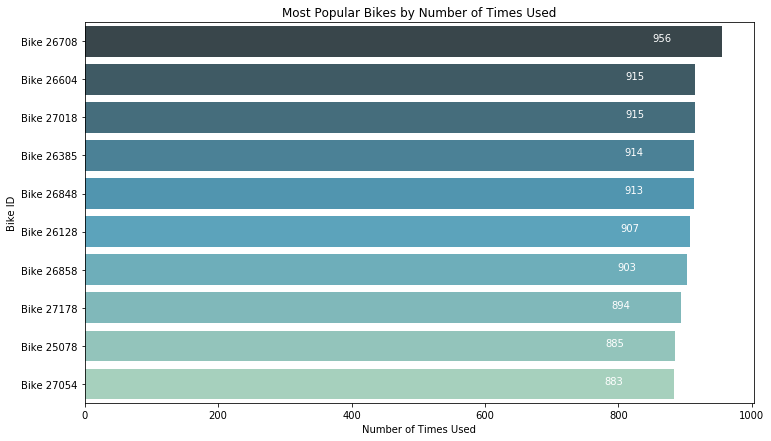

In [113]:

#Visual of most used bike based on Number of Trips
ax8 = sns.barplot('Number of Times Used', 'Bike ID',data = bike_use_df, palette="GnBu_d")
ax8.set_title('Most Popular Bikes by Number of Times Used')
for index, row in bike_use_df.iterrows():
    ax8.text(row['Number of Times Used']-90,index,row['Number of Times Used'], color='white', ha="center", fontsize =10)
plt.show()

In [115]:

#Bike usage based on minutes used
del(ax8)

In [125]:
bike_min_df = pd.DataFrame()
bike_min_df['Minutes Used']= df2.groupby(['Bike ID'])['Minutes'].sum()
bike_min_df = bike_min_df.reset_index()
bike_min_df= bike_min_df.sort_values('Minutes Used' , ascending = False)
bike_min_df['Bike ID'] = bike_min_df['Bike ID'].astype(str)
bike_min_df['Bike ID'] = ('Bike ' + bike_min_df['Bike ID'])
bike_min_df = bike_min_df[:10]
bike_min_df = bike_min_df.reset_index()
bike_min_df

,index,Bike ID,Minutes Used
0,8113,Bike 27018,12236.550000
1,7507,Bike 26385,12151.566667
2,7717,Bike 26604,12139.183333
3,7672,Bike 26555,12126.916667
4,7377,Bike 26128,12088.966667
5,7807,Bike 26708,12016.083333
6,8244,Bike 27151,11975.216667
7,6425,Bike 25145,11957.250000
8,8271,Bike 27178,11935.200000
9,7483,Bike 26361,11890.300000


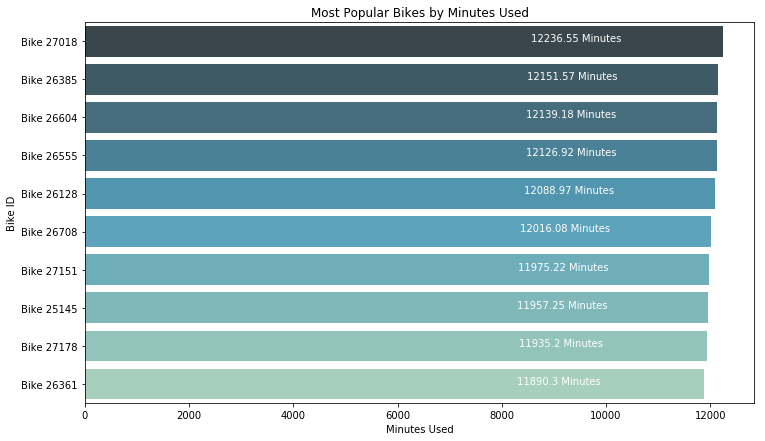

In [126]:
#Visual of most used bike based on number of minutes used
ax9 = sns.barplot('Minutes Used', 'Bike ID',data = bike_min_df, palette="GnBu_d")
ax9.set_title('Most Popular Bikes by Minutes Used')
rcParams['figure.figsize'] = 11,6
for index, row in bike_min_df.iterrows():
    ax9.text(row['Minutes Used']-2800,index,str(round(row['Minutes Used'],2))+' Minutes', 
             color='white', ha="center")
plt.show()